In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
my_root_dir = "/content/drive/MyDrive/Datos/GEE"
dataframe = pd.read_excel('../DataIntermediate/All_data.xlsx')
dataframe.head(382)

,b1,b2,b3,b4,b5,b6,b7,b8,NDVI,SR,...,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster,b8_asm,Id,SAR,CE,Tanbanca,Tabanca_Id
0,548.50,707.00,850.00,926.50,1254.0,1325.00,1664.50,2842.00,0.364127,2.145283,...,0.850000,0.150000,0.460000,0.390000,0.104167,1,26.926614,7.089333,Cafine,1
1,541.00,662.00,784.50,844.50,1083.0,967.00,1356.50,2455.50,0.439585,2.568796,...,0.519413,0.473399,0.337389,0.181547,0.104167,2,86.327645,29.169333,Cafine,1
2,491.00,623.50,765.50,818.00,1034.5,903.50,1446.50,2762.50,0.508677,3.070660,...,0.654887,0.343329,0.461192,0.192468,0.104167,3,112.754286,42.417333,Cafine,1
3,607.00,689.00,840.50,885.00,1112.5,983.00,1362.50,2370.00,0.416839,2.429589,...,0.524789,0.470715,0.431571,0.093336,0.104167,4,193.130080,89.521333,Cafine,1
4,585.50,657.00,762.00,800.50,951.5,861.00,1086.50,1832.00,0.354755,2.100475,...,0.517816,0.474641,0.407218,0.110598,0.104167,5,126.060248,57.628000,Cafine,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,974.50,703.75,1257.25,930.25,1528.5,1228.00,1406.75,2492.50,0.344621,2.075156,...,0.692295,0.310875,0.336182,0.356843,0.104167,96,23.296082,7.016000,Enchugal,3
378,794.75,445.00,946.75,534.00,1075.0,698.25,819.50,1532.00,0.360797,2.177036,...,0.508479,0.489504,0.404964,0.103152,0.105903,97,63.716873,12.658667,Enchugal,3
379,931.25,664.50,1210.50,884.75,1473.0,1163.50,1338.00,2224.75,0.313487,1.940419,...,0.605472,0.394263,0.350643,0.254651,0.104167,98,135.108655,69.085333,Enchugal,3
380,882.50,599.50,1174.50,843.50,1389.5,1079.00,1335.00,2600.00,0.413462,2.424643,...,0.508871,0.488434,0.413577,0.095293,0.104167,99,122.818091,60.008000,Enchugal,3


In [9]:
# Crear DataFrames X1 y y1
X1 = pd.DataFrame(dataframe, columns=['RNDSI','YRNDSI','NDSI','NDWI','GNDVI', 'GCVI', 'GRVI' ,'YRNDVI' ,'NDVI', 'SAVI' ,'RNDVI', 'b1_1 (Clay+Silt)',	'b2_1(Sand_Raster)',	'b3_1 (Silt Raster)',	'b4_1 (Clay Raster']).dropna() # 'b1_1','b2_1','b3_1', 'b4_1'
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()


X1.head()

,RNDSI,YRNDSI,NDSI,NDWI,GNDVI,GCVI,GRVI,YRNDVI,NDVI,SAVI,RNDVI,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster
0,-0.257474,-0.386275,-0.364127,-0.538803,0.538803,2.336546,3.336546,0.386275,0.364127,0.242722,0.257474,0.850000,0.150000,0.460000,0.390000
1,-0.288211,-0.391789,-0.439585,-0.513050,0.513050,2.107235,3.107235,0.391789,0.439585,0.293014,0.288211,0.519413,0.473399,0.337389,0.181547
2,-0.314288,-0.453342,-0.508677,-0.562505,0.562505,2.571547,3.571547,0.453342,0.508677,0.339072,0.314288,0.654887,0.343329,0.461192,0.192468
3,-0.265498,-0.365170,-0.416839,-0.473273,0.473273,1.797036,2.797036,0.365170,0.416839,0.277851,0.265498,0.524789,0.470715,0.431571,0.093336
4,-0.261639,-0.318139,-0.354755,-0.402379,0.402379,1.346602,2.346602,0.318139,0.354755,0.236459,0.261639,0.517816,0.474641,0.407218,0.110598


In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= 71) 

pd.DataFrame(y_train).head(200)
# print(y_train)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (305, 15)
X_test: (77, 15)
y_train: (305, 1)
y_test: (77, 1)


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import seaborn as sns

# List of features
features = ['RNDSI', 'NDSI', 'NDWI','b3_1 (Silt Raster)']  # Add any other indices here 'NDSI','RNDVI','NDWI','b3_1'
num_features = len(features)

# DataFrames X1 and y1
X1 = pd.DataFrame(dataframe, columns=features).dropna()
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()  # or use "CE"

# Model parameters
input_size = num_features  # Number of features
hidden_size = 78
batch_size = 34
num_epochs = 32
learning_rate =  0.023702857142857144
regularization_param = 1e-2
dropout_p = 0.001

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=65)  # Same parameters for consistency

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.flatten(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.flatten(), dtype=torch.float32)

# Create datasets and dataloaders
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [14]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size * (input_size - 2), hidden_size)  # Adjust according to the output size of conv1d
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.bn4 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc5 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))  # Add channel dimension
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = torch.flatten(x, 1)  # Flatten the output of the convolution
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = nn.functional.relu(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Initialize the model
model = CNN()

In [15]:
# Define the loss function and optimizer
loss_fn = nn.SmoothL1Loss()  # Regression loss
optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Training the model
train_losses = []
test_losses = []
train_pearson_corrs = []
test_pearson_corrs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels.unsqueeze(1))  # Add output dimension
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_dl.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dl:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels.unsqueeze(1))  # Add output dimension
            test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_dl.dataset)
    test_losses.append(test_loss)

    # Calculate Pearson correlation for train and test sets
    with torch.no_grad():
        train_outputs = model(X_train_tensor).squeeze().numpy()
        train_labels = y_train_tensor.numpy()
        train_pearson_corr, _ = pearsonr(train_labels, train_outputs)
        train_pearson_corrs.append(train_pearson_corr)

        test_outputs = model(X_test_tensor).squeeze().numpy()
        test_labels = y_test_tensor.numpy()
        test_pearson_corr, _ = pearsonr(test_labels, test_outputs)
        test_pearson_corrs.append(test_pearson_corr)

    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss}, Test Loss: {test_loss}')
        print(f'Train Pearson Correlation: {train_pearson_corr}, Test Pearson Correlation: {test_pearson_corr}')


Epoch [2/32], Train Loss: 44.09614928198643, Test Loss: 38.05668280960678
Train Pearson Correlation: 0.3998604829416763, Test Pearson Correlation: 0.3397484637098387
Epoch [4/32], Train Loss: 39.23904979268058, Test Loss: 35.078188710398486
Train Pearson Correlation: 0.5254425791373478, Test Pearson Correlation: 0.4850299761304768
Epoch [6/32], Train Loss: 35.25484676673764, Test Loss: 35.19649275247153
Train Pearson Correlation: 0.6061285621568686, Test Pearson Correlation: 0.5864244641252299
Epoch [8/32], Train Loss: 32.27742146976659, Test Loss: 33.71418568995092
Train Pearson Correlation: 0.6073220948196649, Test Pearson Correlation: 0.5982131631317316
Epoch [10/32], Train Loss: 29.714099371237833, Test Loss: 29.38903890337263
Train Pearson Correlation: 0.6296363995550394, Test Pearson Correlation: 0.5891282777947708
Epoch [12/32], Train Loss: 27.341135869260693, Test Loss: 29.970700548840806
Train Pearson Correlation: 0.6450488402076644, Test Pearson Correlation: 0.610122331206184

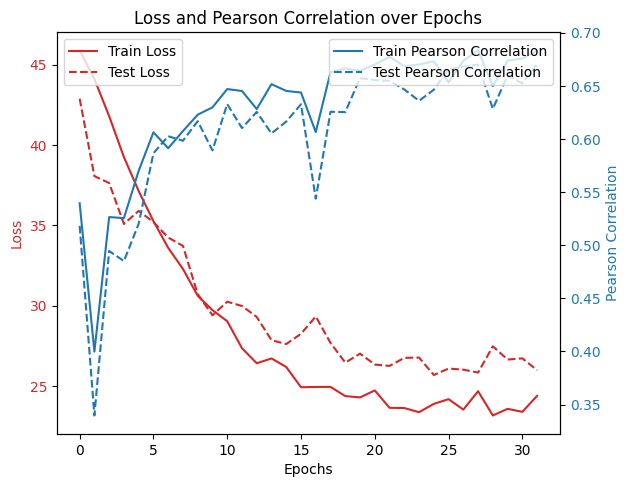

In [16]:
# Plot losses and Pearson correlations
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(num_epochs), train_losses, label='Train Loss', color=color)
ax1.plot(range(num_epochs), test_losses, label='Test Loss', color=color, linestyle='dashed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Pearson Correlation', color=color)
ax2.plot(range(num_epochs), train_pearson_corrs, label='Train Pearson Correlation', color=color)
ax2.plot(range(num_epochs), test_pearson_corrs, label='Test Pearson Correlation', color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Loss and Pearson Correlation over Epochs')
plt.show()

In [17]:
# Obtener el summary del modelo
from torchsummary import summary

summary(model, input_size=(4,))  # input_size debe ser el tamaño de la entrada de tus datos

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 78, 2]             312
       BatchNorm1d-2                [-1, 78, 2]             156
            Linear-3                   [-1, 78]          12,246
       BatchNorm1d-4                   [-1, 78]             156
            Linear-5                   [-1, 78]           6,162
       BatchNorm1d-6                   [-1, 78]             156
            Linear-7                   [-1, 78]           6,162
       BatchNorm1d-8                   [-1, 78]             156
           Dropout-9                   [-1, 78]               0
           Linear-10                    [-1, 1]              79
Total params: 25,585
Trainable params: 25,585
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.10
Estimated Tot

In [18]:
torch.save(model.state_dict(), "../Results/model_CNN.pth")

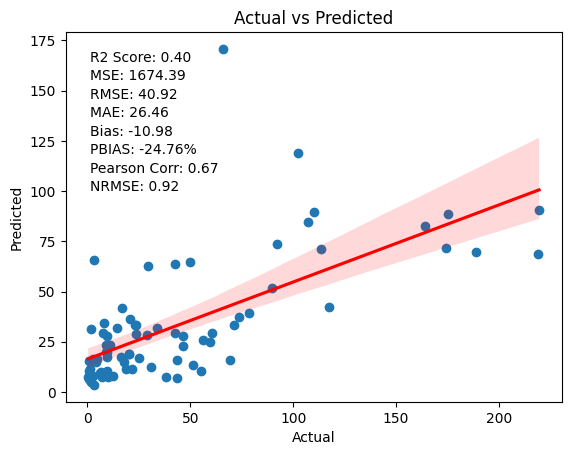

In [24]:
# Función para obtener las predicciones del modelo
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, _ in dataloader:
            outputs = model(inputs)
            predictions.extend(outputs.tolist())
    return predictions

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = get_predictions(model, test_dl)

# Convertir los datos a numpy arrays
y_test_numpy = y_test_tensor.numpy().flatten()
y_pred_numpy = np.array(y_pred).flatten()

# Calcular R2 score
r2 = r2_score(y_test_numpy, y_pred_numpy)

# Calcular MSE, RMSE y MAE
mse = mean_squared_error(y_test_numpy, y_pred_numpy)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_numpy, y_pred_numpy)

# Calcular bias
bias = np.mean(y_pred_numpy - y_test_numpy)

# Calcular PBIAS (Percentage Bias)
pbias = 100 * np.sum(y_pred_numpy - y_test_numpy) / np.sum(y_test_numpy)

# Calcular el coeficiente de correlación de Pearson
pearson_corr, _ = pearsonr(y_test_numpy, y_pred_numpy)

# Calcular NRMSE (Normalized RMSE) usando la media de los valores reales
nrmse = rmse / np.mean(y_test_numpy)

# Plotting the scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test_numpy, y_pred_numpy)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")

# Adding the regression line
sns.regplot(x=y_test_numpy, y=y_pred_numpy, scatter=False, ax=ax, color='red')

# Adding the R2 score, MSE, RMSE, MAE, bias, PBIAS, and NRMSE as annotations
ax.annotate(f'R2 Score: {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.80), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'Bias: {bias:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'PBIAS: {pbias:.2f}%', xy=(0.05, 0.70), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'Pearson Corr: {pearson_corr:.2f}', xy=(0.05, 0.65), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'NRMSE: {nrmse:.2f}', xy=(0.05, 0.60), xycoords='axes fraction', ha='left', va='top')

plt.show()


In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Define your dataset
X_t = pd.DataFrame(dataframe, columns=features).dropna()
y_t = pd.DataFrame(dataframe[["CE"]]).dropna()  # or use "CE"

# Scale features X_t
X_t_scaled = StandardScaler().fit_transform(X_t)

# Convert to PyTorch tensors
X1_tensor = torch.tensor(X_t_scaled, dtype=torch.float32)
y1_tensor = torch.tensor(y_t.values.flatten(), dtype=torch.float32)  # Convert to a 1D tensor

# Create a DataLoader for the X1 and y1 data
data_tensor = TensorDataset(X1_tensor, y1_tensor)
data_loader = DataLoader(data_tensor, batch_size=32)

# Define a function to get predictions from the model
def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, _ in data_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy().flatten())
    return predictions

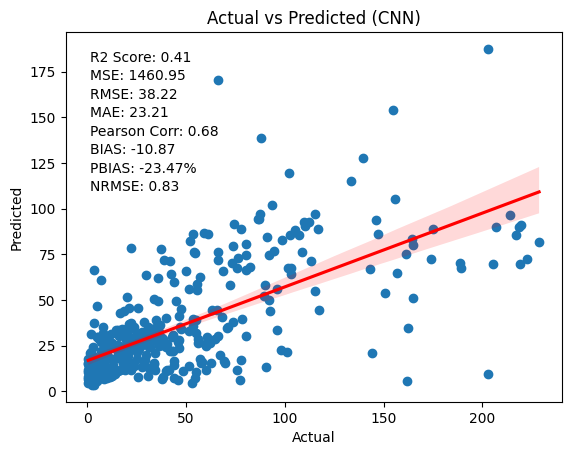

In [22]:
# Get predictions from the model on the X1 data
y_pred_all_cnn = get_predictions(model, data_loader)

# Example calculations (replace with your actual data)
y1_numpy = y1_tensor.numpy().flatten()

# Calculate evaluation metrics
r2_all_cnn = r2_score(y1_numpy, y_pred_all_cnn)
mse_all_cnn = mean_squared_error(y1_numpy, y_pred_all_cnn)
rmse_all_cnn = np.sqrt(mse_all_cnn)
mae_all_cnn = mean_absolute_error(y1_numpy, y_pred_all_cnn)
pearson_corr, _ = pearsonr(y1_numpy, y_pred_all_cnn)

# Calculate BIAS
bias_all_cnn = np.mean(y_pred_all_cnn - y1_numpy)

# Calculate PBIAS
pbias_all_cnn = 100 * np.sum(y_pred_all_cnn - y1_numpy) / np.sum(y1_numpy)

# Calculate NRMSE (Normalized RMSE) using the mean of the actual values
nrmse_all_cnn = rmse_all_cnn / np.mean(y1_numpy)

# Plotting the scatter plot
fig, ax = plt.subplots()
ax.scatter(y1_numpy, y_pred_all_cnn)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted (CNN)")

# Add the regression line
sns.regplot(x=y1_numpy, y=y_pred_all_cnn, scatter=False, ax=ax, color='red')

# Annotate the plot with the evaluation metrics
ax.annotate(f'R2 Score: {r2_all_cnn:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'MSE: {mse_all_cnn:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'RMSE: {rmse_all_cnn:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', ha='left', va='top', fontsize=10)  # Add RMSE
ax.annotate(f'MAE: {mae_all_cnn:.2f}', xy=(0.05, 0.80), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'Pearson Corr: {pearson_corr:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'BIAS: {bias_all_cnn:.2f}', xy=(0.05, 0.70), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'PBIAS: {pbias_all_cnn:.2f}%', xy=(0.05, 0.65), xycoords='axes fraction', ha='left', va='top', fontsize=10)
ax.annotate(f'NRMSE: {nrmse_all_cnn:.2f}', xy=(0.05, 0.60), xycoords='axes fraction', ha='left', va='top', fontsize=10)

plt.show()

In [29]:
import torch
import itertools
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import pandas as pd


# Definir la arquitectura de la CNN
class CNN(nn.Module):
    def __init__(self, input_size, hidden_size=84, dropout_p=0.01):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size * (input_size - 2), hidden_size)  # Adjust according to the output size of conv1d
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.bn4 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc5 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))  # Add channel dimension
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = torch.flatten(x, 1)  # Flatten the output of the convolution
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = nn.functional.relu(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x

def grid_search(X_train, X_test, y_train, y_test, hidden_sizes, batch_sizes, learning_rates, regularization_params, dropout_ps, num_epochs_range, epoch_interval):
    results = []
    for num_epochs in num_epochs_range:
        for hidden_size, batch_size, learning_rate, regularization_param, dropout_p in itertools.product(hidden_sizes, batch_sizes, learning_rates, regularization_params, dropout_ps):
            print(f'Training model with hidden size {hidden_size}, batch size {batch_size}, learning rate {learning_rate}, regularization param {regularization_param}, dropout p {dropout_p}, num_epochs {num_epochs}')
            # Convertir los datos de DataFrame a numpy arrays
            X_train_np, y_train_np = X_train.to_numpy(), y_train.to_numpy().flatten()
            X_test_np, y_test_np = X_test.to_numpy(), y_test.to_numpy().flatten()

            # Inicializar el modelo
            model = CNN(input_size=X_train_np.shape[1], hidden_size=hidden_size, dropout_p=dropout_p)

            # Definir la función de pérdida y el optimizador
            loss_fn = nn.SmoothL1Loss()
            optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

            # Crear DataLoader
            train_ds = TensorDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.float32))
            test_ds = TensorDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.float32))
            train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
            test_dl = DataLoader(test_ds, batch_size=batch_size)

            # Entrenamiento del modelo
            train_losses = []
            test_losses = []

            for epoch in range(num_epochs):
                model.train()
                train_loss = 0.0
                for inputs, labels in train_dl:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = loss_fn(outputs, labels.unsqueeze(1))
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() * inputs.size(0)
                train_loss /= len(train_dl.dataset)
                train_losses.append(train_loss)

                model.eval()
                test_loss = 0.0
                with torch.no_grad():
                    for inputs, labels in test_dl:
                        outputs = model(inputs)
                        loss = loss_fn(outputs, labels.unsqueeze(1))
                        test_loss += loss.item() * inputs.size(0)
                test_loss /= len(test_dl.dataset)
                test_losses.append(test_loss)

                if (epoch + 1) % epoch_interval == 0:
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss}, Test Loss: {test_loss}')

            # Guardar los resultados del modelo
            results.append({
                'hidden_size': hidden_size,
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'regularization_param': regularization_param,
                'dropout_p': dropout_p,
                'num_epochs': num_epochs,
                'train_losses': train_losses,
                'test_losses': test_losses,
                'final_test_loss': test_loss
            })

    # Encontrar el modelo con el menor test loss final
    best_model_result = min(results, key=lambda x: x['final_test_loss'])

    return best_model_result, results

# Definir los rangos para los hiperparámetros


hidden_sizes = [64, 128, 256]
num_epochs_range = [50, 100, 150]
batch_sizes = [32, 64, 128]
learning_rates = [0.01, 0.1, 0.5]
regularization_params = [0.0001, 0.001, 0.01]
dropout_ps = [0.01, 0., 0.1]
epoch_interval = 10


# Realizar grid search
best_model, all_results = grid_search(X_train, X_test, y_train, y_test, hidden_sizes, batch_sizes, learning_rates, regularization_params, dropout_ps, num_epochs_range, epoch_interval)

# Imprimir los hiperparámetros del mejor modelo
print('Best Model Hyperparameters:')
print(best_model)

# Gráfico de pérdidas
plt.figure(figsize=(10, 6))
for result in all_results:
    plt.plot(range(len(result['train_losses'])), result['train_losses'], label=f"Hidden Size: {result['hidden_size']}, Batch Size: {result['batch_size']}, Learning Rate: {result['learning_rate']}, Regularization Param: {result['regularization_param']}, Dropout P: {result['dropout_p']}, Num Epochs: {result['num_epochs']}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Losses for Different Hyperparameters')
plt.legend()
plt.show()


Training model with hidden size 64, batch size 32, learning rate 0.01, regularization param 0.0001, dropout p 0.01, num_epochs 50
Epoch [10/50], Train Loss: 42.05859445040343, Test Loss: 39.313994667746805
Epoch [20/50], Train Loss: 37.478124555994256, Test Loss: 37.06640139493075
Epoch [30/50], Train Loss: 33.727329341700816, Test Loss: 33.175052890529884
Epoch [40/50], Train Loss: 30.873357722798332, Test Loss: 31.93607216376763
Epoch [50/50], Train Loss: 28.356308371121766, Test Loss: 29.912597408542386
Training model with hidden size 64, batch size 32, learning rate 0.01, regularization param 0.0001, dropout p 0.0, num_epochs 50
Epoch [10/50], Train Loss: 42.005397008677, Test Loss: 39.63900538853237
Epoch [20/50], Train Loss: 37.4859712444368, Test Loss: 34.93539307334206
Epoch [30/50], Train Loss: 33.4360686005139, Test Loss: 31.638413119625735
Epoch [40/50], Train Loss: 30.77959509052214, Test Loss: 32.31589433744356
Epoch [50/50], Train Loss: 28.33074538434138, Test Loss: 29.30

KeyboardInterrupt: 